In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

In [5]:
df = pd.read_csv('//Users/anmolagarwal/Documents/Python/Mini Project 1/songs_normalize.csv')

In [6]:
# Get random sample
df.sample(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
718,Ciara,Like a Boy,237053,False,2006,68,0.701,0.724,0,-5.751,0,0.1450,0.26700,0.000000,0.0867,0.425,132.035,"pop, R&B"
337,Ashanti,Rain On Me,297960,False,2003,50,0.606,0.699,8,-3.103,0,0.0337,0.34300,0.000002,0.0757,0.509,83.701,"hip hop, pop, R&B"
1988,Panic! At The Disco,High Hopes,190946,False,2018,80,0.579,0.904,5,-2.729,1,0.0618,0.19300,0.000000,0.0640,0.681,82.014,rock
1921,Travis Scott,SICKO MODE,312820,True,2018,81,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,"hip hop, Dance/Electronic"
846,Natasha Bedingfield,Pocketful of Sunshine,203440,False,2008,62,0.726,0.881,9,-3.892,0,0.0391,0.20300,0.000000,0.1080,0.682,110.019,pop


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [8]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


## Let's look into what each feature means:

- **artist:** Name of the Artist.
- **song:** Name of the Track.
- **duration_ms:** Duration of the track in milliseconds.
- **explicit:** The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
- **year:** Release Year of the track.
- **popularity:** The higher the value the more popular the song is.
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **genre:** Genre of the track.


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        How many songs we have from each year?
    </h2>
    </div>

In [9]:
songs_per_years = df['year'].value_counts().sort_index()
songs_per_years

year
1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
Name: count, dtype: int64

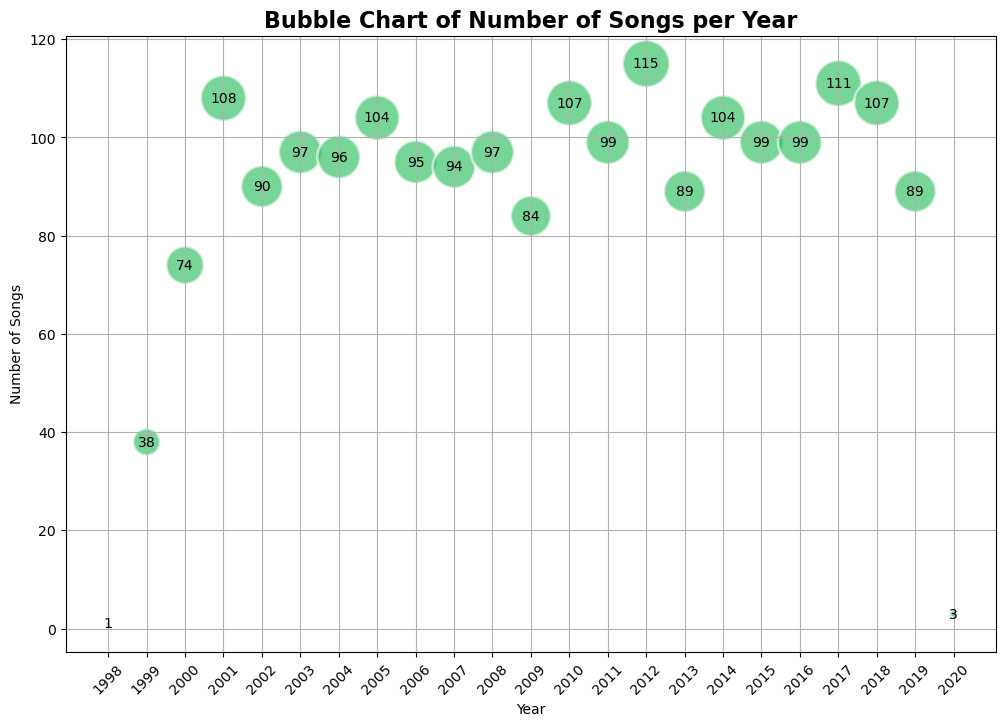

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the number of songs per year
songs_per_years_df = df['year'].value_counts().sort_index().reset_index()
songs_per_years_df.columns = ['year', 'Songs']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bubble chart using Matplotlib
plt.scatter(data=songs_per_years_df, x='year', y='Songs', s=songs_per_years_df['Songs']*10, color='#1DB954', alpha=0.6, edgecolors='w', linewidth=2)

# Add titles and labels
plt.title('Bubble Chart of Number of Songs per Year', fontsize=16, fontweight='heavy')
plt.xlabel('Year')
plt.ylabel('Number of Songs')

# Add text annotations on bubbles
for x, y in zip(songs_per_years_df['year'], songs_per_years_df['Songs']):
    plt.text(x, y, str(y), color='black', fontsize=10, ha='center', va='center')

# Set x-axis ticks to display all years
plt.xticks(ticks=songs_per_years_df['year'], labels=songs_per_years_df['year'], rotation=45)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        All the artists in this list
    </h2>
    </div>
    
- **We have 2000 songs, let's see how many artists are there in total**

In [11]:
print(f"There are about [{df['artist'].nunique()}] artists.")

There are about [835] artists.


In [12]:
artists = df['artist'].value_counts()
artists.head()

artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
Name: count, dtype: int64

- **We've a total of 835 artists. Let's explore the top.**


In [13]:
2000 - artists[:50].sum()

1401

In [14]:
iplot(px.pie(values=[artists[:50].sum(), 2000-artists[:50].sum()], 
       names=['top 50 artists',f'other {835-50} artists'], 
       title="How many songs do the top 50 artists have?",
       color_discrete_sequence = ['#4287f5', '#f54287']
      ).update_traces(textinfo='value'))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        No. of artists with only 1 song VS artists with more than 1
    </h2>
    </div>

In [15]:
artists_with_one_song = artists.loc[lambda x:x == 1]
len(artists_with_one_song)

494

In [16]:
len(artists)-len(artists_with_one_song)

341

In [17]:
artists_with_one_song = artists.loc[lambda x:x == 1]

iplot(px.pie(values=[len(artists_with_one_song), len(artists)-len(artists_with_one_song)],
             names=['1 song', '>1 songs'], 
             title="Artists with 1 top hit VS Artists with >1 top hit",
             color_discrete_sequence=['#4287f5', '#f54287']
      ).update_traces(textinfo='label'))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        Top 10 Artists with the average popularity of their songs
    </h2>
    </div>

In [18]:
artists.values

array([25, 23, 21, 20, 19, 18, 17, 17, 16, 16, 16, 15, 14, 14, 13, 13, 13,
       12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [19]:
artist_df = df[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')
artists = artists.sort_index()

artist_df['total songs'] = artists.values

artist_df.sort_values(by='total songs',ascending=False, inplace=True)

artist_df.reset_index(inplace=True)

artist_df

,artist,popularity,total songs
0,Rihanna,72.120000,25
1,Drake,61.913043,23
2,Eminem,72.333333,21
3,Calvin Harris,67.800000,20
4,Britney Spears,63.052632,19
...,...,...,...
830,Khia,59.000000,1
831,Kevin Rudolf,66.000000,1
832,Kevin Lyttle,67.000000,1
833,Kevin Gates,69.000000,1


In [20]:
artist_df = df[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')
artists = artists.sort_index()

artist_df['total songs'] = artists.values
artist_df.sort_values(by='total songs',ascending=False, inplace=True)
artist_df.reset_index(inplace=True)

iplot(px.scatter(  artist_df[:10], 
                   x='artist', 
                   y='popularity', 
                   size='total songs',
                   size_max=60,
                   color='popularity',
                   title='Top 10 artists vs average popularity of their top hits',
                   hover_name='artist'
          ))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        How has the average duration of songs changed through the years?
    </h2>
    </div>

- **In this, we'll skip the years 1998 and 1999 since they have few examples**

In [21]:
df['year'].value_counts().sort_index()

year
1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
Name: count, dtype: int64

In [22]:
df['duration_ms']

0       211160
1       167066
2       250546
3       224493
4       200560
         ...  
1995    181026
1996    178426
1997    200593
1998    171029
1999    215280
Name: duration_ms, Length: 2000, dtype: int64

In [23]:
ms = 211160
sec = ms / 1000
min = sec // 60
# print(int(min))
second = int(sec % 60)
# print(second)
print(f'{int(min)}:{int(sec % 60)}')

3:31


In [24]:
# Function to convert duration in ms into min:sec
def ms_to_minsec(ms):
    sec = ms / 1000
    return f"{int(sec // 60)}:{int(sec % 60)}"

# Skip the years 1998 and 2020
durations = df[['duration_ms', 'year']].groupby('year').mean().reset_index().iloc[1:-1]
# Convert duration in ms into seconds
durations['duration_s'] = durations['duration_ms'] / 1000
# Apply ms_to_minsec function
durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)

# Plot
iplot(px.line(durations, 
        x='year', 
        y='duration_s',
        title='average song duration over the years',
        text='min:sec'
       ).update_xaxes(type='category').update_traces(textposition='top right'))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        Longest song VS Shortest song
    </h2>
    </div>

In [25]:
asdy = df.loc[:, ['artist','song','duration_ms','year']]
asdy['min:sec'] = asdy['duration_ms'].apply(ms_to_minsec)

In [26]:
asdy

,artist,song,duration_ms,year,min:sec
0,Britney Spears,Oops!...I Did It Again,211160,2000,3:31
1,blink-182,All The Small Things,167066,1999,2:47
2,Faith Hill,Breathe,250546,1999,4:10
3,Bon Jovi,It's My Life,224493,2000,3:44
4,*NSYNC,Bye Bye Bye,200560,2000,3:20
...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,2019,3:1
1996,Taylor Swift,Cruel Summer,178426,2019,2:58
1997,Blanco Brown,The Git Up,200593,2019,3:20
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,2019,2:51


In [27]:
# Longest song
asdy[asdy.duration_ms == asdy.duration_ms.max()]

,artist,song,duration_ms,year,min:sec
1381,Justin Timberlake,Mirrors,484146,2013,8:4


In [28]:
# Shortest song
asdy[asdy.duration_ms == asdy.duration_ms.min()]

,artist,song,duration_ms,year,min:sec
1931,Lil Nas X,Old Town Road,113000,2019,1:53


- The longest song is ***Mirrors*** by **Justin Timberlake**: 8:04s

- The shortest song is ***Old Town Road*** by **Lil Nas X**: 1:53s

In [29]:
year_explicit = df.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()
year_explicit.rename(columns={False:'Clean', True: 'Explicit'}, inplace=True)
year_explicit

explicit,year,Clean,Explicit
0,1998,0,1
1,1999,30,8
2,2000,62,12
3,2001,85,23
4,2002,60,30
5,2003,74,23
6,2004,60,36
7,2005,75,29
8,2006,69,26
9,2007,72,22


In [30]:
year_explicit = df.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()
year_explicit.rename(columns={False:'Clean', True: 'Explicit'}, inplace=True)

iplot(px.bar(year_explicit, 
             x='year',
             y=['Clean', 'Explicit'], 
             title='Explicit vs Clean distribution each year',
             color_discrete_sequence=['cornflowerblue', 'crimson']
      ).update_xaxes(type='category'))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        Major VS Minor in each Key
    </h2>
    </div>

In [31]:
key_mode = df.groupby(['key','mode']).size().unstack(fill_value=0).reset_index()
key_names = r'C C♯/D♭ D E♭/D♯ E F F♯/G♭ G A♭/G♯ A B♭/A♯ B'.split()
key_mode.rename(columns={0:'minor',1:'major'}, inplace=True)
key_mode['key name'] = key_names

iplot(px.bar(key_mode, 
       x='key name', 
       y=['major', 'minor'],
       color_discrete_sequence=px.colors.qualitative.Pastel2,
       title='Major vs Minor per key'
      ))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        Distributions
    </h2>
    </div>

In [32]:
histogram_labels = ['popularity',
                    'danceability', 
                    'energy', 
                    'speechiness', 
                    'loudness', 
                    'acousticness', 
                    'liveness', 
                    'instrumentalness',
                    'valence',
                    'tempo'
                   ]

colors = px.colors.qualitative.Vivid

for i in range(len(histogram_labels)):
    iplot(px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      ))